# NLP Application with ML

## Classification of Tweets Data

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 50)

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [6]:
df = pd.read_csv("airline_tweets.csv")
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

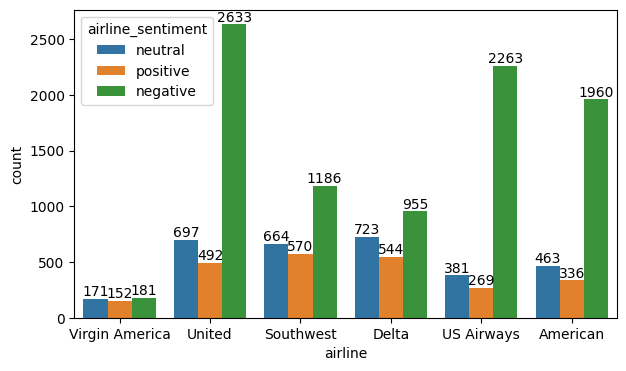

In [7]:
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment")
for p in ax.containers:
    ax.bar_label(p)

# We are visualizing the number of comments received by airline companies based on the target.

In [8]:
ax = sns.countplot(data =df, x ="negativereason")
ax.bar_label(ax.containers[0])
plt.xticks(rotation =90);

# We are visualizing the number of reasons for negative comments.

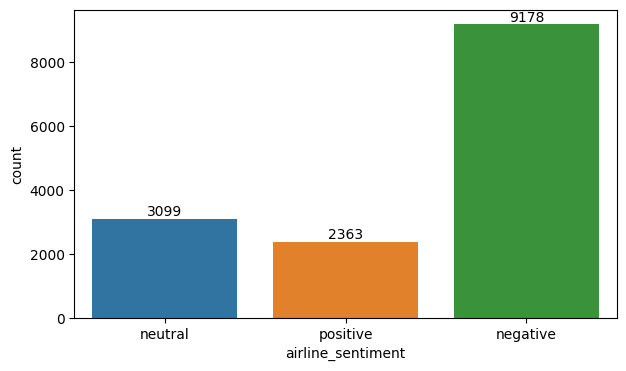

In [9]:
ax = sns.countplot(data =df, x = "airline_sentiment")
ax.bar_label(ax.containers[0]);

# We are visualizing the number of the classes.

In [10]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Cleaning Data

In [11]:
df2 = df.copy()

In [12]:
df2["text"].head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

### Cleaning URL, Tags, Mentions for Tweets

In [13]:
import re
s = "http\\:www.mynet.com #lateflight @airlines"
s = re.sub("http\S+", "", s).strip()
s

# \S represents all characters except whitespace.

# http\S+ represents patterns starting with 'http' followed by one or more characters excluding whitespace.
# http\S* represents patterns starting with 'http' followed by zero or more characters excluding whitespace.
# The 'sub' function in regex allows us to find and remove the desired patterns or replace them with desired character(s) in the given text.
# The code re.sub("http\S+", "", s) finds and removes patterns in the 's' variable text that start with 'http' followed by one or more characters
# excluding whitespace.
# The code re.sub("http\S+", "a", s) finds and replaces patterns in the 's' variable text that start with 'http' followed by one or more characters
# excluding whitespace with the character 'a'.

'#lateflight @airlines'

In [14]:
s = re.sub("#\S+", "", s)
s

# We are cleaning the tag. However, as you can see, a whitespace character appeared at the beginning of the text.

' @airlines'

In [15]:
s = re.sub("@\S+", "", s)
s.strip()

# We are cleaning the mention.

# Since \S represents all characters except whitespace, as you can see above, it doesn't affect spaces. Therefore, we are removing any leading or
# trailing whitespace characters in our text using the strip() function.

''

negative_auxiliary_verbs = ["no", 'not', "n't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", "don't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn',"needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', ,"won't", 'wouldn', "wouldn't"]

stop_words = stopwords.words('english')

for i in negative_auxiliary_verbs: stop_words.remove(i)

You can also remove negative auxiliary verbs with the for loop you will construct. If you are going to remove negative auxiliary verbs like in this case, don't forget to remove the 4th step in the cleaning function below.

In [16]:
stop_words = set(stopwords.words('english'))

words_to_exclude = {"no", "not"}

stop_words.difference_update(words_to_exclude) # to include --> stopwords.add(words_to_include)

#for i in ["not", "no"]:
#        stop_words.remove(i)

In [17]:
def cleaning(data):

    import re

    #1. Removing URLS
    data = re.sub('http\S*', '', data).strip()
    data = re.sub('www\S*', '', data).strip()

    #2. Removing Tags
    data = re.sub('#\S*', '', data).strip()

    #3. Removing Mentions
    data = re.sub('@\S*', '', data).strip()

    #4. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #5. Tokenize
    text_tokens = word_tokenize(data.lower())

    #6. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #7. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #8. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]


    #9. joining
    return " ".join( text_cleaned)

In [18]:
cleaning_text = df2["text"].apply(cleaning)
# We are cleaning the text and assigning it to the variable 'cleaning_text'. We will use it in the WordCloud visualization at the end of the notebook.

In [19]:
cleaning_text.head(10)

0                                                 said
1         plus youve added commercial experience tacky
2         didnt today must mean need take another trip
3    really aggressive blast obnoxious entertainmen...
4                                 really big bad thing
5    seriously would pay flight seat didnt playing ...
6        yes nearly every time fly vx ear worm go away
7    really missed prime opportunity men without ha...
8                                                 well
9                amazing arrived hour early youre good
Name: text, dtype: object

## Features and Label

In [20]:
df2 =df2[["airline_sentiment", "text"]]
df2.head()

airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...

## Train Test Split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df2["text"]
y = df2["airline_sentiment"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

## Vectorization

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3) # ngram_range=(1,3), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

# By assigning the cleaning function we defined above to the 'preprocessor' parameter, we can perform the cleaning process within the CountVectorizer
# transformation algorithm.
# min_df = 3 --> Ignore tokens that appear in less than 3 documents (comments) in the corpus.
# max_df = 1000 --> Ignore tokens that appear in more than 1000 documents (comments) in the corpus.

# max_df = 0.95 --> Ignore tokens that appear in at least 95% of the comments in the corpus.
# Values like 2, 3, 4 can be chosen for min_df, and values of 0.95 and above can be chosen for max_df.
# max_features = 1500 --> Consider only the top 1500 most frequently used features (tokens) in the corpus, ignore the others.

# ngram is used for better learning of patterns in the text (e.g., noun phrases, adjective phrases, etc.).
# For the comment "Very nice Sony TV"
# When ngram = 1, all tokens are separated one by one: very, nice, sony, TV
# When ngram = 2, all tokens are separated two by two: very nice, nice sony, sony TV
# When ngram = 3, all tokens are separated three by three: very nice sony, nice sony TV
# ngram_range = (1, 3) means that all tokens are divided into their 1-gram, 2-gram, and 3-gram representations.
# ngram_range = (1, 4) means that all tokens are divided into their 1-gram, 2-gram, 3-gram, and 4-gram representations.

In [26]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [27]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

aa  aadvantage  abc  ability  able  aboard  abq  absolute  absolutely  \
0       0           0    0        0     0       0    0         0           0   
1       0           0    0        0     0       0    0         0           0   
2       0           0    0        0     0       0    0         0           0   
3       0           0    0        0     0       0    0         0           0   
4       0           0    0        0     0       0    0         0           0   
...    ..         ...  ...      ...   ...     ...  ...       ...         ...   
11707   0           0    0        0     0       0    0         0           0   
11708   0           0    0        0     0       0    0         0           0   
11709   0           0    0        0     0       0    0         0           0   
11710   0           0    0        0     0       0    0         0           0   
11711   1           0    0        0     0       0    0         0           0   

       absurd  abt  abysmal  ac  accept  acceptable  accepted  accepting  \
0           0    0        0   0       0           0         0          0   
1           0    0        0   0       0           0         0          0   
2           0    0        0   0       0           0         0          0   
3           0    0        0   0       0           0         0          0   
4           0    0        0   0       0           0         0          0   
...       ...  ...      ...  ..     ...         ...       ...        ...   
11707       0    0        0   0       0           0         0          0   
11708       0    0        0   0       0           0         0          0   
11709       0    0        0   0       0           0         0          0   
11710       0    0        0   0       0           0         0          0   
11711       0    0        0   0       0           0         0          0   

       access  accident  accommodate  accommodating  accommodation  \
0           0         0            0              0              0   
1           0         0            0              0              0   
2           0         0            0              0              0   
3           0         0            0              0              0   
4           0         0            0              0              0   
...       ...       ...          ...            ...            ...   
11707       0         0            0              0              0   
11708       0         0            0              0              0   
11709       0         0            0              0              0   
11710       0         0            0              0              0   
11711       0         0            0              0              0   

       accomplished  according  accordingly  ...  yea  yeah  year  yell  \
0                 0          0            0  ...    0     0     0     0   
1                 0          0            0  ...    0     0     0     0   
2                 0          0            0  ...    0     0     0     0   
3                 0          0            0  ...    0     0     0     0   
4                 0          0            0  ...    0     0     0     0   
...             ...        ...          ...  ...  ...   ...   ...   ...   
11707             0          0            0  ...    0     0     0     0   
11708             0          0            0  ...    0     0     0     0   
11709             0          0            0  ...    0     0     0     0   
11710             0          0            0  ...    0     0     0     0   
11711             0          0            0  ...    0     0     0     0   

       yelled  yelling  yep  yes  yest  yesterday  yet  yo  york  youd  youll  \
0           0        0    0    0     0          0    0   0     0     0      0   
1           0        0    0    0     0          0    0   0     0     0      0   
2           0        0    0    0     0          0    0   0     0     0      0   
3           0        0    0    0     0          0    0   0     0   

## Model Comparisons - Vectorization

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [29]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))


## Naive Bayes

The name Naive Bayes is given due to the fundamental assumption of the algorithm, which is the 'naive' assumption that features/tokens are independent of each other. This assumption disregards the relationships between features/tokens in real-world applications and calculates the probabilities separately for each feature/token. Although this assumption is often not valid in real-life scenarios and can decrease the accuracy of the algorithm, Naive Bayes is still widely used and yields very good results.

Bayes' Theorem is one of the fundamental principles of probability theory.

In conditional probability, Bayes' Theorem is a mathematical theorem used to calculate the probability of an event occurring based on the probabilities of all other events necessary for that event to occur.

https://medium.com/analytics-vidhya/na%C3%AFve-bayes-algorithm-5bf31e9032a2


**PROBABILITY OF A POSITIVE COMMENT:**

P(positive | great TV bad shipping): The probability of the comment being **"positive"** when the comment is **"great TV bad shipping"**.

**P(positive | great TV bad shipping) = P(great TV bad shipping | positive) x P(positive) / P(great TV bad shipping)**

P(great TV bad shipping | positive): The probability of **the TV being great** and **the shipping being bad** in a** positive** comment.

P(positive): The probability of a comment being **positive** in the corpus.

P(great TV bad shipping): The probability of **the TV being great** and **the shipping being bad** in a comment in the corpus.

**PROBABILITY OF A NEGATIVE COMMENT:**

P(negative | great TV bad shipping): The probability of the comment being **"negative"** when the comment is **"great TV bad shipping"**.

**P(negative | great TV bad shipping) = P(great TV bad shipping | negative) x P(negative) / P(great TV bad shipping)**

P(great TV bad shipping | negative): The probability of **the TV being great** and **the shipping being bad** in a **negative** comment.

P(negative): The probability of a comment being **negative** in the corpus.

P(great TV bad shipping): The probability of **the TV being great** and **the shipping being bad** in a comment in the corpus.

For example, P(great TV, bad shipping | Positive) --> In order to calculate the probability of the comment being positive when the TV is great and the shipping is bad, we need to know the probabilities of the tokens "great", "TV", "bad", and "shipping" occurring in positive comments in the corpus. Without this information, we cannot calculate the probability of this comment being positive.

ATTENTION: When Bayes' theorem is used for classification, **the denominator is not used** for both **positive and negative comments** since the denominator would be the same.

image.png

### Alpha Hyper-Parameter for Naive Bayes



image.png

In [30]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model

In [31]:
nb = MultinomialNB(alpha=10)
nb.fit(X_train_count,y_train)

# Although MultinomialNB is recommended for multiclass data and BernoulliNB for binary data, we will try both algorithms regardless of the type of
# our data and continue with the one that yields good results.

# The Gaussian algorithm is not recommended for NLP data.

# We can use the alpha hyperparameter to control overfitting. However, increasing the alpha value too much can deteriorate our model's performance,
# so we can use sample_weight/class_weight to address overfitting.

MultinomialNB(alpha=10)

In [32]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1793   27   15]
 [ 467  129   24]
 [ 251   16  206]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83      1835
     neutral       0.75      0.21      0.33       620
    positive       0.84      0.44      0.57       473

    accuracy                           0.73      2928
   macro avg       0.77      0.54      0.57      2928
weighted avg       0.74      0.73      0.68      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      7343
     neutral       0.80      0.25      0.38      2479
    positive       0.86      0.44      0.58      1890

    accuracy                           0.74     11712
   macro avg       0.79      0.56      0.60     11712
weighted avg       0.76      0.74      0.70     11712



In [33]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[1793   27   15]
 [ 467  129   24]
 [ 251   16  206]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.83      1835
     neutral       0.75      0.21      0.33       620
    positive       0.84      0.44      0.57       473

    accuracy                           0.73      2928
   macro avg       0.77      0.54      0.57      2928
weighted avg       0.74      0.73      0.68      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.72      0.98      0.83      7343
     neutral       0.80      0.25      0.38      2479
    positive       0.86      0.44      0.58      1890

    accuracy                           0.74     11712
   macro avg       0.79      0.56      0.60     11712
weighted avg       0.76      0.74      0.70     11712



In [34]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-neg': make_scorer(precision_score, average=None, labels=["negative"]),
            'recall-neg': make_scorer(recall_score, average=None, labels = ["negative"]),
            'f1-neg': make_scorer(f1_score, average=None, labels = ["negative"])}

model = MultinomialNB(alpha=10)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.714482
train_accuracy         0.734147
test_precision-neg     0.704816
train_precision-neg    0.717316
test_recall-neg        0.978891
train_recall-neg       0.984293
test_f1-neg            0.819534
train_f1-neg           0.829860
dtype: float64

In [35]:
!pip install scikit-plot

In [36]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = MultinomialNB(alpha=10)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [37]:
pd.get_dummies(y_test)

negative  neutral  positive
1756          1        0         0
10942         0        0         1
3797          1        0         0
6126          0        0         1
10600         1        0         0
...         ...      ...       ...
8977          1        0         0
8509          1        0         0
8454          0        1         0
7397          1        0         0
14138         1        0         0

[2928 rows x 3 columns]

In [38]:
y_pred_proba

array([[9.99735933e-01, 7.20348296e-05, 1.92032369e-04],
       [7.49206173e-01, 1.18002533e-01, 1.32791295e-01],
       [9.85076760e-01, 1.38594918e-02, 1.06374861e-03],
       ...,
       [5.23026415e-01, 1.96247238e-01, 2.80726347e-01],
       [9.79683192e-01, 1.83167223e-02, 2.00008520e-03],
       [9.99972542e-01, 2.70613427e-05, 3.96936005e-07]])

In [39]:
from sklearn.metrics import average_precision_score

y_test_dummies = pd.get_dummies(y_test)

y_pred = nb.predict(X_test_count)
nb_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

In [40]:
average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

0.9150023178880152

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000) #class_weight='balanced'
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, max_iter=1000)

In [42]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1759   40   36]
 [ 366  211   43]
 [ 177   47  249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.76      0.96      0.85      1835
     neutral       0.71      0.34      0.46       620
    positive       0.76      0.53      0.62       473

    accuracy                           0.76      2928
   macro avg       0.74      0.61      0.64      2928
weighted avg       0.75      0.76      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.77      0.97      0.86      7343
     neutral       0.76      0.41      0.53      2479
    positive       0.79      0.51      0.62      1890

    accuracy                           0.77     11712
   macro avg       0.77      0.63      0.67     11712
weighted avg       0.77      0.77      0.75     11712



In [43]:
model = LogisticRegression(C = 0.02, max_iter=1000)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.745731
train_accuracy         0.765198
test_precision-neg     0.747621
train_precision-neg    0.761601
test_recall-neg        0.963501
train_recall-neg       0.970705
test_f1-neg            0.841924
train_f1-neg           0.853532
dtype: float64

In [44]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C = 0.02, max_iter=1000)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [45]:
y_pred = log.predict(X_test_count)
log_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balanced Logistic Regression

In [46]:
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000)

In [47]:
print("LOG MODEL BALANCED")
eval(log, X_train_count, X_test_count)

LOG MODEL BALANCED
[[1302  435   98]
 [  98  447   75]
 [  34   96  343]]
Test_Set
              precision    recall  f1-score   support

    negative       0.91      0.71      0.80      1835
     neutral       0.46      0.72      0.56       620
    positive       0.66      0.73      0.69       473

    accuracy                           0.71      2928
   macro avg       0.68      0.72      0.68      2928
weighted avg       0.77      0.71      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.74      0.82      7343
     neutral       0.51      0.78      0.62      2479
    positive       0.67      0.75      0.71      1890

    accuracy                           0.75     11712
   macro avg       0.70      0.75      0.72     11712
weighted avg       0.80      0.75      0.76     11712



## SVM

In [48]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [49]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1711   80   44]
 [ 291  279   50]
 [ 124   50  299]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1835
     neutral       0.68      0.45      0.54       620
    positive       0.76      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      7343
     neutral       0.76      0.55      0.64      2479
    positive       0.80      0.63      0.70      1890

    accuracy                           0.82     11712
   macro avg       0.80      0.71      0.74     11712
weighted avg       0.81      0.82      0.81     11712



In [50]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.777494
train_accuracy         0.816475
test_precision-neg     0.799702
train_precision-neg    0.828654
test_recall-neg        0.939396
train_recall-neg       0.957087
test_f1-neg            0.863922
train_f1-neg           0.888251
dtype: float64

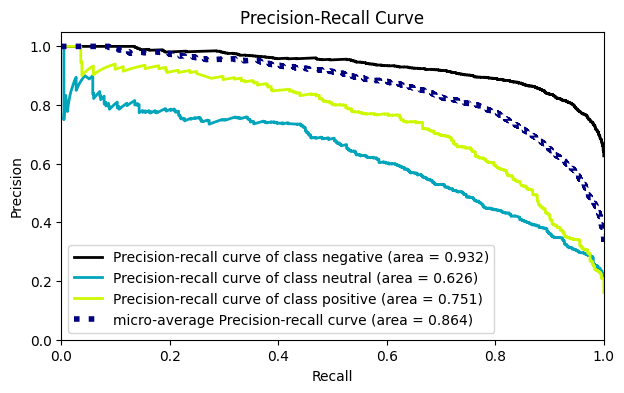

In [51]:
from scikitplot.metrics import plot_roc, plot_precision_recall


model = LinearSVC(C=0.01)

model.fit(X_train_count, y_train)

decision_function = model.decision_function(X_test_count)

plot_precision_recall(y_test, decision_function)
plt.show();

In [52]:
decision_function

array([[ 0.58568642, -1.44514287, -0.33463081],
       [-0.4680601 , -0.20012769, -0.3435134 ],
       [ 0.21511969, -0.36062656, -0.91787985],
       ...,
       [-0.31245486, -0.20113427, -0.41047569],
       [ 0.30030832, -0.30533056, -1.00152772],
       [ 1.4993048 , -1.1621773 , -1.67558687]])

In [53]:
y_pred = svc.predict(X_test_count)
svc_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_AP_neg = average_precision_score(y_test_dummies["negative"], decision_function[:, 0])

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_count,y_train)

KNeighborsClassifier(n_neighbors=7)

In [55]:
print("KNN MODEL")
eval(knn, X_train_count, X_test_count)

KNN MODEL
[[912 839  84]
 [113 447  60]
 [ 46 178 249]]
Test_Set
              precision    recall  f1-score   support

    negative       0.85      0.50      0.63      1835
     neutral       0.31      0.72      0.43       620
    positive       0.63      0.53      0.58       473

    accuracy                           0.55      2928
   macro avg       0.60      0.58      0.54      2928
weighted avg       0.70      0.55      0.58      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.90      0.62      0.73      7343
     neutral       0.39      0.82      0.53      2479
    positive       0.70      0.56      0.62      1890

    accuracy                           0.65     11712
   macro avg       0.66      0.66      0.63     11712
weighted avg       0.76      0.65      0.67     11712



In [56]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.530654
train_accuracy         0.646099
test_precision-neg     0.846802
train_precision-neg    0.903680
test_recall-neg        0.466436
train_recall-neg       0.609394
test_f1-neg            0.601124
train_f1-neg           0.727858
dtype: float64

In [57]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [58]:
y_pred = knn.predict(X_test_count)
knn_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1) # class_weight="balanced"
rf.fit(X_train_count, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [60]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1798   11   26]
 [ 523   59   38]
 [ 219    7  247]]
Test_Set
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1835
     neutral       0.77      0.10      0.17       620
    positive       0.79      0.52      0.63       473

    accuracy                           0.72      2928
   macro avg       0.76      0.53      0.54      2928
weighted avg       0.73      0.72      0.65      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.74      1.00      0.85      7343
     neutral       0.97      0.20      0.34      2479
    positive       0.92      0.63      0.75      1890

    accuracy                           0.77     11712
   macro avg       0.88      0.61      0.64     11712
weighted avg       0.82      0.77      0.72     11712



In [61]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.710040
train_accuracy         0.774059
test_precision-neg     0.698911
train_precision-neg    0.742447
test_recall-neg        0.984338
train_recall-neg       0.997397
test_f1-neg            0.817418
train_f1-neg           0.851242
dtype: float64

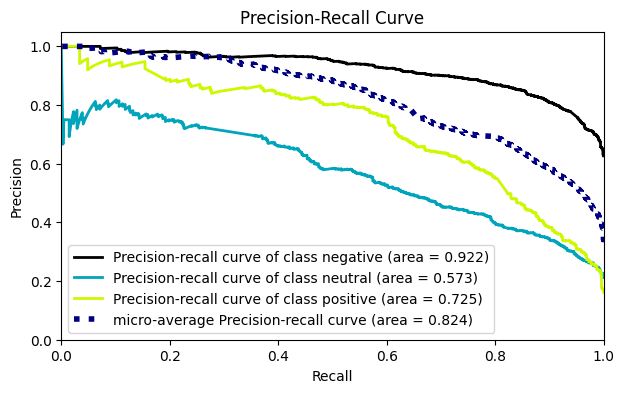

In [62]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [63]:
y_pred = rf.predict(X_test_count)
rf_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balance Random Forest

In [64]:
rf = RandomForestClassifier(100, max_depth = 40, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=42)

In [65]:
print("RF MODEL BALANCED")
eval(rf, X_train_count, X_test_count)

RF MODEL BALANCED
[[1455  305   75]
 [ 152  403   65]
 [  53   97  323]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.79      0.83      1835
     neutral       0.50      0.65      0.57       620
    positive       0.70      0.68      0.69       473

    accuracy                           0.74      2928
   macro avg       0.69      0.71      0.70      2928
weighted avg       0.77      0.74      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.97      0.85      0.91      7343
     neutral       0.64      0.90      0.75      2479
    positive       0.87      0.82      0.85      1890

    accuracy                           0.86     11712
   macro avg       0.83      0.86      0.83     11712
weighted avg       0.89      0.86      0.86     11712



## Ada Boost

In [66]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [67]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1555  205   75]
 [ 210  339   71]
 [  86   72  315]]
Test_Set
              precision    recall  f1-score   support

    negative       0.84      0.85      0.84      1835
     neutral       0.55      0.55      0.55       620
    positive       0.68      0.67      0.67       473

    accuracy                           0.75      2928
   macro avg       0.69      0.69      0.69      2928
weighted avg       0.75      0.75      0.75      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.87      0.88      0.87      7343
     neutral       0.61      0.62      0.62      2479
    positive       0.79      0.71      0.75      1890

    accuracy                           0.80     11712
   macro avg       0.75      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [68]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.759136
train_accuracy         0.802131
test_precision-neg     0.842861
train_precision-neg    0.866759
test_recall-neg        0.856597
train_recall-neg       0.883699
test_f1-neg            0.849649
train_f1-neg           0.875144
dtype: float64

In [69]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_count, y_train)

y_pred_proba = model.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [70]:
y_pred = ada.predict(X_test_count)
ada_count_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_count_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## TF-IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

# By assigning the cleaning function we defined above to the 'preprocessor' parameter, we can perform the cleaning process within the TfidfVectorizer
# transformation algorithm.
# min_df = 3 --> Ignore tokens that appear in less than 3 documents (comments) in the corpus.
# max_df = 1000 --> Ignore tokens that appear in more than 1000 documents (comments) in the corpus.

# max_df = 0.95 --> Ignore tokens that appear in at least 95% of the comments in the corpus.
# Values like 2, 3, 4 can be chosen for min_df, and values of 0.95 and above can be chosen for max_df.
# max_features = 1500 --> Consider only the top 1500 most frequently used features (tokens) in the corpus, ignore the others.

# ngram is used for better learning of patterns in the text (e.g., noun phrases, adjective phrases, etc.).
# For the comment "Very nice Sony TV"
# When ngram = 1, all tokens are separated one by one: very, nice, sony, TV
# When ngram = 2, all tokens are separated two by two: very nice, nice sony, sony TV
# When ngram = 3, all tokens are separated three by three: very nice sony, nice sony TV
# ngram_range = (1, 3) means that all tokens are divided into their 1-gram, 2-gram, and 3-gram representations.
# ngram_range = (1, 4) means that all tokens are divided into their 1-gram, 2-gram, 3-gram, and 4-gram representations.

In [73]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32545156, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [74]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

aa  aadvantage  abc  ability  able  aboard  abq  absolute  \
0      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
1      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
2      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
3      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
4      0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
...         ...         ...  ...      ...   ...     ...  ...       ...   
11707  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11708  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11709  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11710  0.000000         0.0  0.0      0.0   0.0     0.0  0.0       0.0   
11711  0.325452         0.0  0.0      0.0   0.0     0.0  0.0       0.0   

       absolutely  absurd  abt  abysmal   ac  accept  acceptable  accepted  \
0             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
1             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
2             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
3             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
4             0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
...           ...     ...  ...      ...  ...     ...         ...       ...   
11707         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11708         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11709         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11710         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   
11711         0.0     0.0  0.0      0.0  0.0     0.0         0.0       0.0   

       accepting  access  accident  accommodate  accommodating  accommodation  \
0            0.0     0.0       0.0          0.0            0.0            0.0   
1            0.0     0.0       0.0          0.0            0.0            0.0   
2            0.0     0.0       0.0          0.0            0.0            0.0   
3            0.0     0.0       0.0          0.0            0.0            0.0   
4            0.0     0.0       0.0          0.0            0.0            0.0   
...          ...     ...       ...          ...            ...            ...   
11707        0.0     0.0       0.0          0.0            0.0            0.0   
11708        0.0     0.0       0.0          0.0            0.0            0.0   
11709        0.0     0.0       0.0          0.0            0.0            0.0   
11710        0.0     0.0       0.0          0.0            0.0            0.0   
11711        0.0     0.0       0.0          0.0            0.0            0.0   

       accomplished  according  accordingly  ...  yea  yeah  year  yell  \
0               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
1               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
2               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
3               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
4               0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
...             ...        ...          ...  ...  ...   ...   ...   ...   
11707           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11708           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11709           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11710           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   
11711           0.0        0.0          0.0  ...  0.0   0.0   0.0   0.0   

       yelled  yelling  yep  yes  yest  yesterday  yet   yo  york  youd  \
0         0.0      0.0  0.0  0.0   0.0        0.0  0.0  0.0   0.0   0.0   
1         0.0      0.0  0.0  0.0   0.0        0.0  0.0  0.0   0.0   0.0   
2         0.0      0.0  0.0  0.0   0.0        0.0  0.0  0.0   0.0   0.0   
3         0.0

## Model Comparisons  TF-IDF

## Naive Bayes

In [75]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train)

MultinomialNB()

In [76]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1802   25    8]
 [ 426  172   22]
 [ 248   31  194]]
Test_Set
              precision    recall  f1-score   support

    negative       0.73      0.98      0.84      1835
     neutral       0.75      0.28      0.41       620
    positive       0.87      0.41      0.56       473

    accuracy                           0.74      2928
   macro avg       0.78      0.56      0.60      2928
weighted avg       0.76      0.74      0.70      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.75      0.99      0.85      7343
     neutral       0.84      0.35      0.50      2479
    positive       0.91      0.51      0.65      1890

    accuracy                           0.78     11712
   macro avg       0.84      0.62      0.67     11712
weighted avg       0.80      0.78      0.75     11712



In [77]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.731643
train_accuracy         0.774277
test_precision-neg     0.721593
train_precision-neg    0.751007
test_recall-neg        0.978890
train_recall-neg       0.988818
test_f1-neg            0.830756
train_f1-neg           0.853659
dtype: float64

In [78]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = MultinomialNB()

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [79]:
y_pred = nb.predict(X_test_tf_idf)
nb_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
nb_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.4, max_iter=1000)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, max_iter=1000)

In [81]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1757   51   27]
 [ 332  256   32]
 [ 144   47  282]]
Test_Set
              precision    recall  f1-score   support

    negative       0.79      0.96      0.86      1835
     neutral       0.72      0.41      0.53       620
    positive       0.83      0.60      0.69       473

    accuracy                           0.78      2928
   macro avg       0.78      0.66      0.69      2928
weighted avg       0.78      0.78      0.76      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.82      0.97      0.89      7343
     neutral       0.82      0.53      0.64      2479
    positive       0.87      0.62      0.73      1890

    accuracy                           0.82     11712
   macro avg       0.84      0.71      0.75     11712
weighted avg       0.83      0.82      0.81     11712



In [82]:
model = LogisticRegression(C=0.4, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.771432
train_accuracy         0.821200
test_precision-neg     0.776135
train_precision-neg    0.813160
test_recall-neg        0.960506
train_recall-neg       0.976818
test_f1-neg            0.858515
train_f1-neg           0.887507
dtype: float64

In [83]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LogisticRegression(C=0.4, max_iter=1000)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [84]:
y_pred = log.predict(X_test_tf_idf)
log_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
log_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balanced Logistic Regression

In [85]:
log = LogisticRegression(C=0.4, max_iter=1000, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.4, class_weight='balanced', max_iter=1000)

In [86]:
print("LOG MODEL BALANCED")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL BALANCED
[[1432  304   99]
 [ 121  427   72]
 [  39   71  363]]
Test_Set
              precision    recall  f1-score   support

    negative       0.90      0.78      0.84      1835
     neutral       0.53      0.69      0.60       620
    positive       0.68      0.77      0.72       473

    accuracy                           0.76      2928
   macro avg       0.70      0.75      0.72      2928
weighted avg       0.79      0.76      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.94      0.81      0.87      7343
     neutral       0.61      0.80      0.69      2479
    positive       0.74      0.84      0.79      1890

    accuracy                           0.81     11712
   macro avg       0.76      0.82      0.78     11712
weighted avg       0.84      0.81      0.82     11712



## SVM

In [87]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1)

In [88]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1737   64   34]
 [ 312  263   45]
 [ 124   44  305]]
Test_Set
              precision    recall  f1-score   support

    negative       0.80      0.95      0.87      1835
     neutral       0.71      0.42      0.53       620
    positive       0.79      0.64      0.71       473

    accuracy                           0.79      2928
   macro avg       0.77      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.84      0.97      0.90      7343
     neutral       0.83      0.56      0.67      2479
    positive       0.87      0.68      0.76      1890

    accuracy                           0.84     11712
   macro avg       0.84      0.74      0.78     11712
weighted avg       0.84      0.84      0.83     11712



In [89]:
model = LinearSVC(C=0.1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.781934
train_accuracy         0.838010
test_precision-neg     0.790352
train_precision-neg    0.832907
test_recall-neg        0.956965
train_recall-neg       0.974897
test_f1-neg            0.865677
train_f1-neg           0.898323
dtype: float64

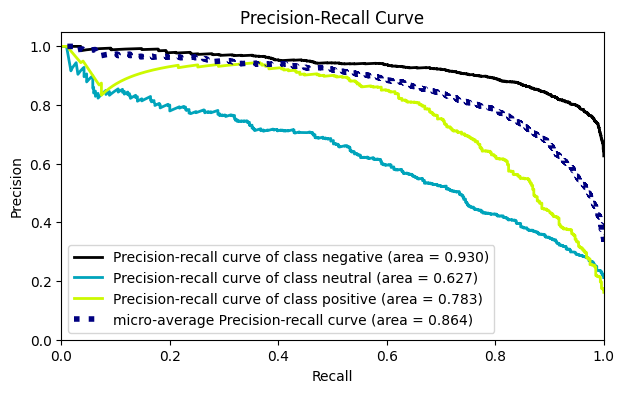

In [90]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = LinearSVC(C=0.1)

model.fit(X_train_tf_idf, y_train)

decision_function = model.decision_function(X_test_tf_idf)

plot_precision_recall(y_test, decision_function)
plt.show();

In [91]:
y_pred = svc.predict(X_test_tf_idf)
svc_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
svc_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], decision_function[:, 0])

## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_tf_idf,y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
print("KNN MODEL")
eval(knn, X_train_tf_idf, X_test_tf_idf)

KNN MODEL
[[  77 1756    2]
 [  18  588   14]
 [   5  378   90]]
Test_Set
              precision    recall  f1-score   support

    negative       0.77      0.04      0.08      1835
     neutral       0.22      0.95      0.35       620
    positive       0.85      0.19      0.31       473

    accuracy                           0.26      2928
   macro avg       0.61      0.39      0.25      2928
weighted avg       0.67      0.26      0.17      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.88      0.07      0.12      7343
     neutral       0.22      0.97      0.36      2479
    positive       0.88      0.21      0.34      1890

    accuracy                           0.28     11712
   macro avg       0.66      0.41      0.28     11712
weighted avg       0.74      0.28      0.21     11712



In [94]:
model = KNeighborsClassifier(n_neighbors=7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.261351
train_accuracy         0.330719
test_precision-neg     0.801045
train_precision-neg    0.896092
test_recall-neg        0.051465
train_recall-neg       0.148178
test_f1-neg            0.094072
train_f1-neg           0.197470
dtype: float64

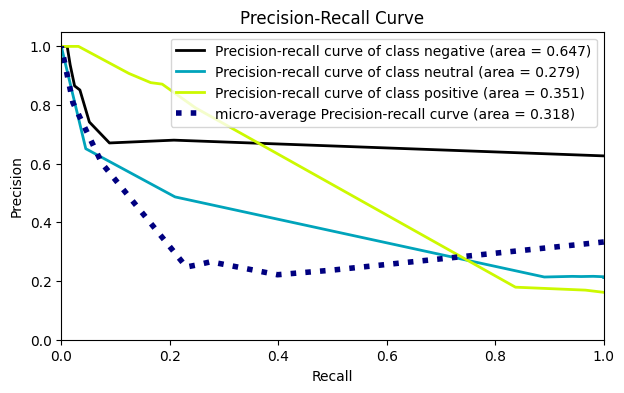

In [95]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [96]:
y_pred = knn.predict(X_test_tf_idf)
knn_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
knn_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

## RandomForest

In [97]:
rf = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(max_depth=40, n_jobs=-1, random_state=42)

In [98]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1805   10   20]
 [ 532   53   35]
 [ 242    7  224]]
Test_Set
              precision    recall  f1-score   support

    negative       0.70      0.98      0.82      1835
     neutral       0.76      0.09      0.15       620
    positive       0.80      0.47      0.60       473

    accuracy                           0.71      2928
   macro avg       0.75      0.51      0.52      2928
weighted avg       0.73      0.71      0.64      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.73      1.00      0.84      7343
     neutral       0.98      0.21      0.34      2479
    positive       0.94      0.58      0.72      1890

    accuracy                           0.76     11712
   macro avg       0.88      0.60      0.64     11712
weighted avg       0.82      0.76      0.72     11712



In [99]:
model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.707565
train_accuracy         0.766204
test_precision-neg     0.694344
train_precision-neg    0.733642
test_recall-neg        0.988288
train_recall-neg       0.998199
test_f1-neg            0.815631
train_f1-neg           0.845712
dtype: float64

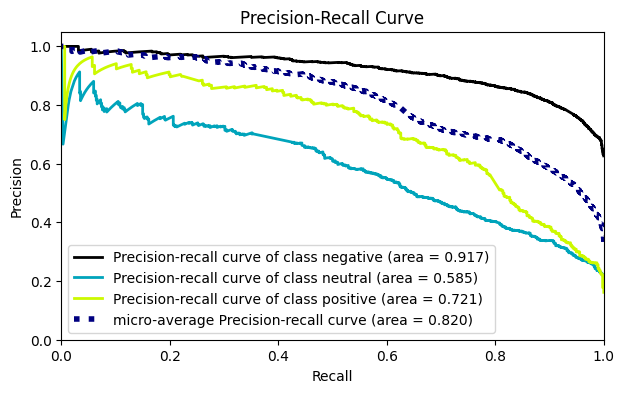

In [100]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = RandomForestClassifier(100, max_depth=40, random_state = 42, n_jobs = -1)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [101]:
y_pred = rf.predict(X_test_tf_idf)
rf_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
rf_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

### Balanced Random Forest

In [102]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [103]:
print("RF MODEL BALANCED")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL BALANCED
[[1353  386   96]
 [ 129  423   68]
 [  47  108  318]]
Test_Set
              precision    recall  f1-score   support

    negative       0.88      0.74      0.80      1835
     neutral       0.46      0.68      0.55       620
    positive       0.66      0.67      0.67       473

    accuracy                           0.72      2928
   macro avg       0.67      0.70      0.67      2928
weighted avg       0.76      0.72      0.73      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.93      0.76      0.84      7343
     neutral       0.52      0.81      0.63      2479
    positive       0.74      0.72      0.73      1890

    accuracy                           0.77     11712
   macro avg       0.73      0.76      0.73     11712
weighted avg       0.81      0.77      0.78     11712



## Ada Boost

In [104]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [105]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1536  226   73]
 [ 228  331   61]
 [  99   73  301]]
Test_Set
              precision    recall  f1-score   support

    negative       0.82      0.84      0.83      1835
     neutral       0.53      0.53      0.53       620
    positive       0.69      0.64      0.66       473

    accuracy                           0.74      2928
   macro avg       0.68      0.67      0.67      2928
weighted avg       0.74      0.74      0.74      2928

Train_Set
              precision    recall  f1-score   support

    negative       0.85      0.88      0.87      7343
     neutral       0.62      0.62      0.62      2479
    positive       0.83      0.73      0.77      1890

    accuracy                           0.80     11712
   macro avg       0.77      0.74      0.75     11712
weighted avg       0.80      0.80      0.80     11712



In [106]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy          0.739755
train_accuracy         0.796287
test_precision-neg     0.823338
train_precision-neg    0.851597
test_recall-neg        0.843797
train_recall-neg       0.874574
test_f1-neg            0.833389
train_f1-neg           0.862921
dtype: float64

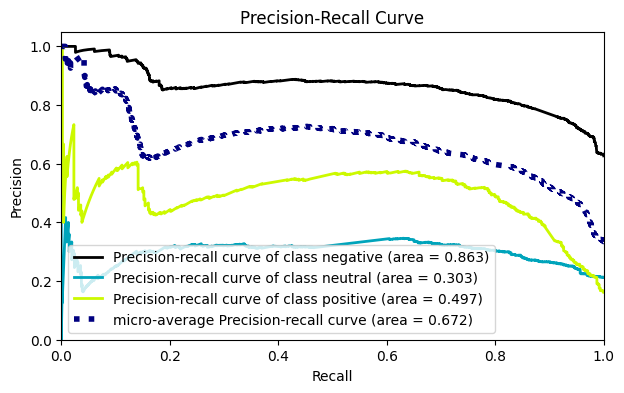

In [107]:
from scikitplot.metrics import plot_roc, plot_precision_recall

model = AdaBoostClassifier(n_estimators= 500, random_state = 42)

model.fit(X_train_tf_idf, y_train)

y_pred_proba = model.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [108]:
y_pred = ada.predict(X_test_tf_idf)
ada_tfidf_rec_neg = recall_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_f1_neg = f1_score(y_test, y_pred, labels = ["negative"], average = None)
ada_tfidf_AP_neg = average_precision_score(y_test_dummies["negative"], y_pred_proba[:, 0])

In [109]:
nb_count_f1_neg[0]

0.8251265531523241

## Customized TF-IDF - Allan Method :)

In [131]:
# Separate documents by sentiment
positive_docs = df2[df2['airline_sentiment'] == "positive"]
neutral_docs = df2[df2['airline_sentiment'] == "neutral"]
negative_docs = df2[df2['airline_sentiment'] == "negative"]

In [132]:
# Create custom IDF dictionary
custom_idf_dict = {}
total_num_docs = len(df)

In [137]:
for token in set(token for doc in df2['text'] for token in doc.split()):
  # Calculate the number of opposite-class documents containing the token
  opposite_class_count = 0

  if any(token in doc.split() for doc in neutral_docs['text']):
    opposite_class_count += len(positive_docs) + len(negative_docs)
  if any(token in doc.split() for doc in positive_docs['text']):
    opposite_class_count += len(neutral_docs) + len(negative_docs)
  if any(token in doc.split() for doc in negative_docs['text']):
    opposite_class_count += len(positive_docs) + len(neutral_docs)

  custom_idf = 1 + (total_num_docs - opposite_class_count + 0.5) / (opposite_class_count + 0.5)
  custom_idf_dict[token] = custom_idf

In [138]:
# Initialize the custom TF-IDF vectorizer
custom_tfidf_vectorizer = TfidfVectorizer(vocabulary=custom_idf_dict.keys(), norm=None, use_idf=False)

In [139]:
# Fit and transform the documents
tfidf_matrix = custom_tfidf_vectorizer.fit_transform(df['text'])

In [144]:
X = tfidf_matrix.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [145]:
y = df2["airline_sentiment"]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [147]:
model = LogisticRegression()  # You can replace this with your chosen algorithm
model.fit(X_train, y_train)

LogisticRegression()

## Compare Scoring

In [110]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "KNN_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", "KNN_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf"],

                        "F1_Score_Negative": [nb_count_f1_neg[0], log_count_f1_neg[0], svc_count_f1_neg[0], knn_count_f1_neg[0],
                                             rf_count_f1_neg[0], ada_count_f1_neg[0], nb_tfidf_f1_neg[0], log_tfidf_f1_neg[0],
                                             svc_tfidf_f1_neg[0], knn_tfidf_f1_neg[0], rf_tfidf_f1_neg[0], ada_tfidf_f1_neg[0]],

                        "Recall_Score_Negative": [nb_count_rec_neg[0], log_count_rec_neg[0], svc_count_rec_neg[0],
                                                  knn_count_rec_neg[0], rf_count_rec_neg[0], ada_count_rec_neg[0],
                                                  nb_tfidf_rec_neg[0], log_tfidf_rec_neg[0], svc_tfidf_rec_neg[0],
                                                  knn_tfidf_rec_neg[0], rf_tfidf_rec_neg[0], ada_tfidf_rec_neg[0]],

                        "Average_Precision_Score_Negative": [nb_AP_neg, log_AP_neg, svc_AP_neg, knn_AP_neg, rf_AP_neg,
                                                          ada_AP_neg, nb_tfidf_AP_neg, log_tfidf_AP_neg, svc_tfidf_AP_neg,
                                                           knn_tfidf_AP_neg, rf_tfidf_AP_neg, ada_tfidf_AP_neg]})

compare

Model  F1_Score_Negative  Recall_Score_Negative  \
0      NaiveBayes_count           0.825127               0.977112   
1          LogReg_count           0.850375               0.958583   
2             SVM_count           0.863923               0.932425   
3             KNN_count           0.627667               0.497003   
4   Random Forest_count           0.821943               0.979837   
5        AdaBoost_count           0.843733               0.847411   
6      NaiveBayes_tfidf           0.836001               0.982016   
7          LogReg_tfidf           0.863815               0.957493   
8             SVM_tfidf           0.866766               0.946594   
9             KNN_tfidf           0.079587               0.041962   
10  Random Forest_tfidf           0.817852               0.983651   
11       AdaBoost_tfidf           0.830719               0.837057   

    Average_Precision_Score_Negative  
0                           0.915002  
1                           0.926440  
2                           0.932457  
3                           0.827559  
4                           0.921508  
5                           0.867506  
6                           0.920984  
7                           0.930036  
8                           0.930120  
9                           0.646645  
10                          0.917044  
11                          0.862517

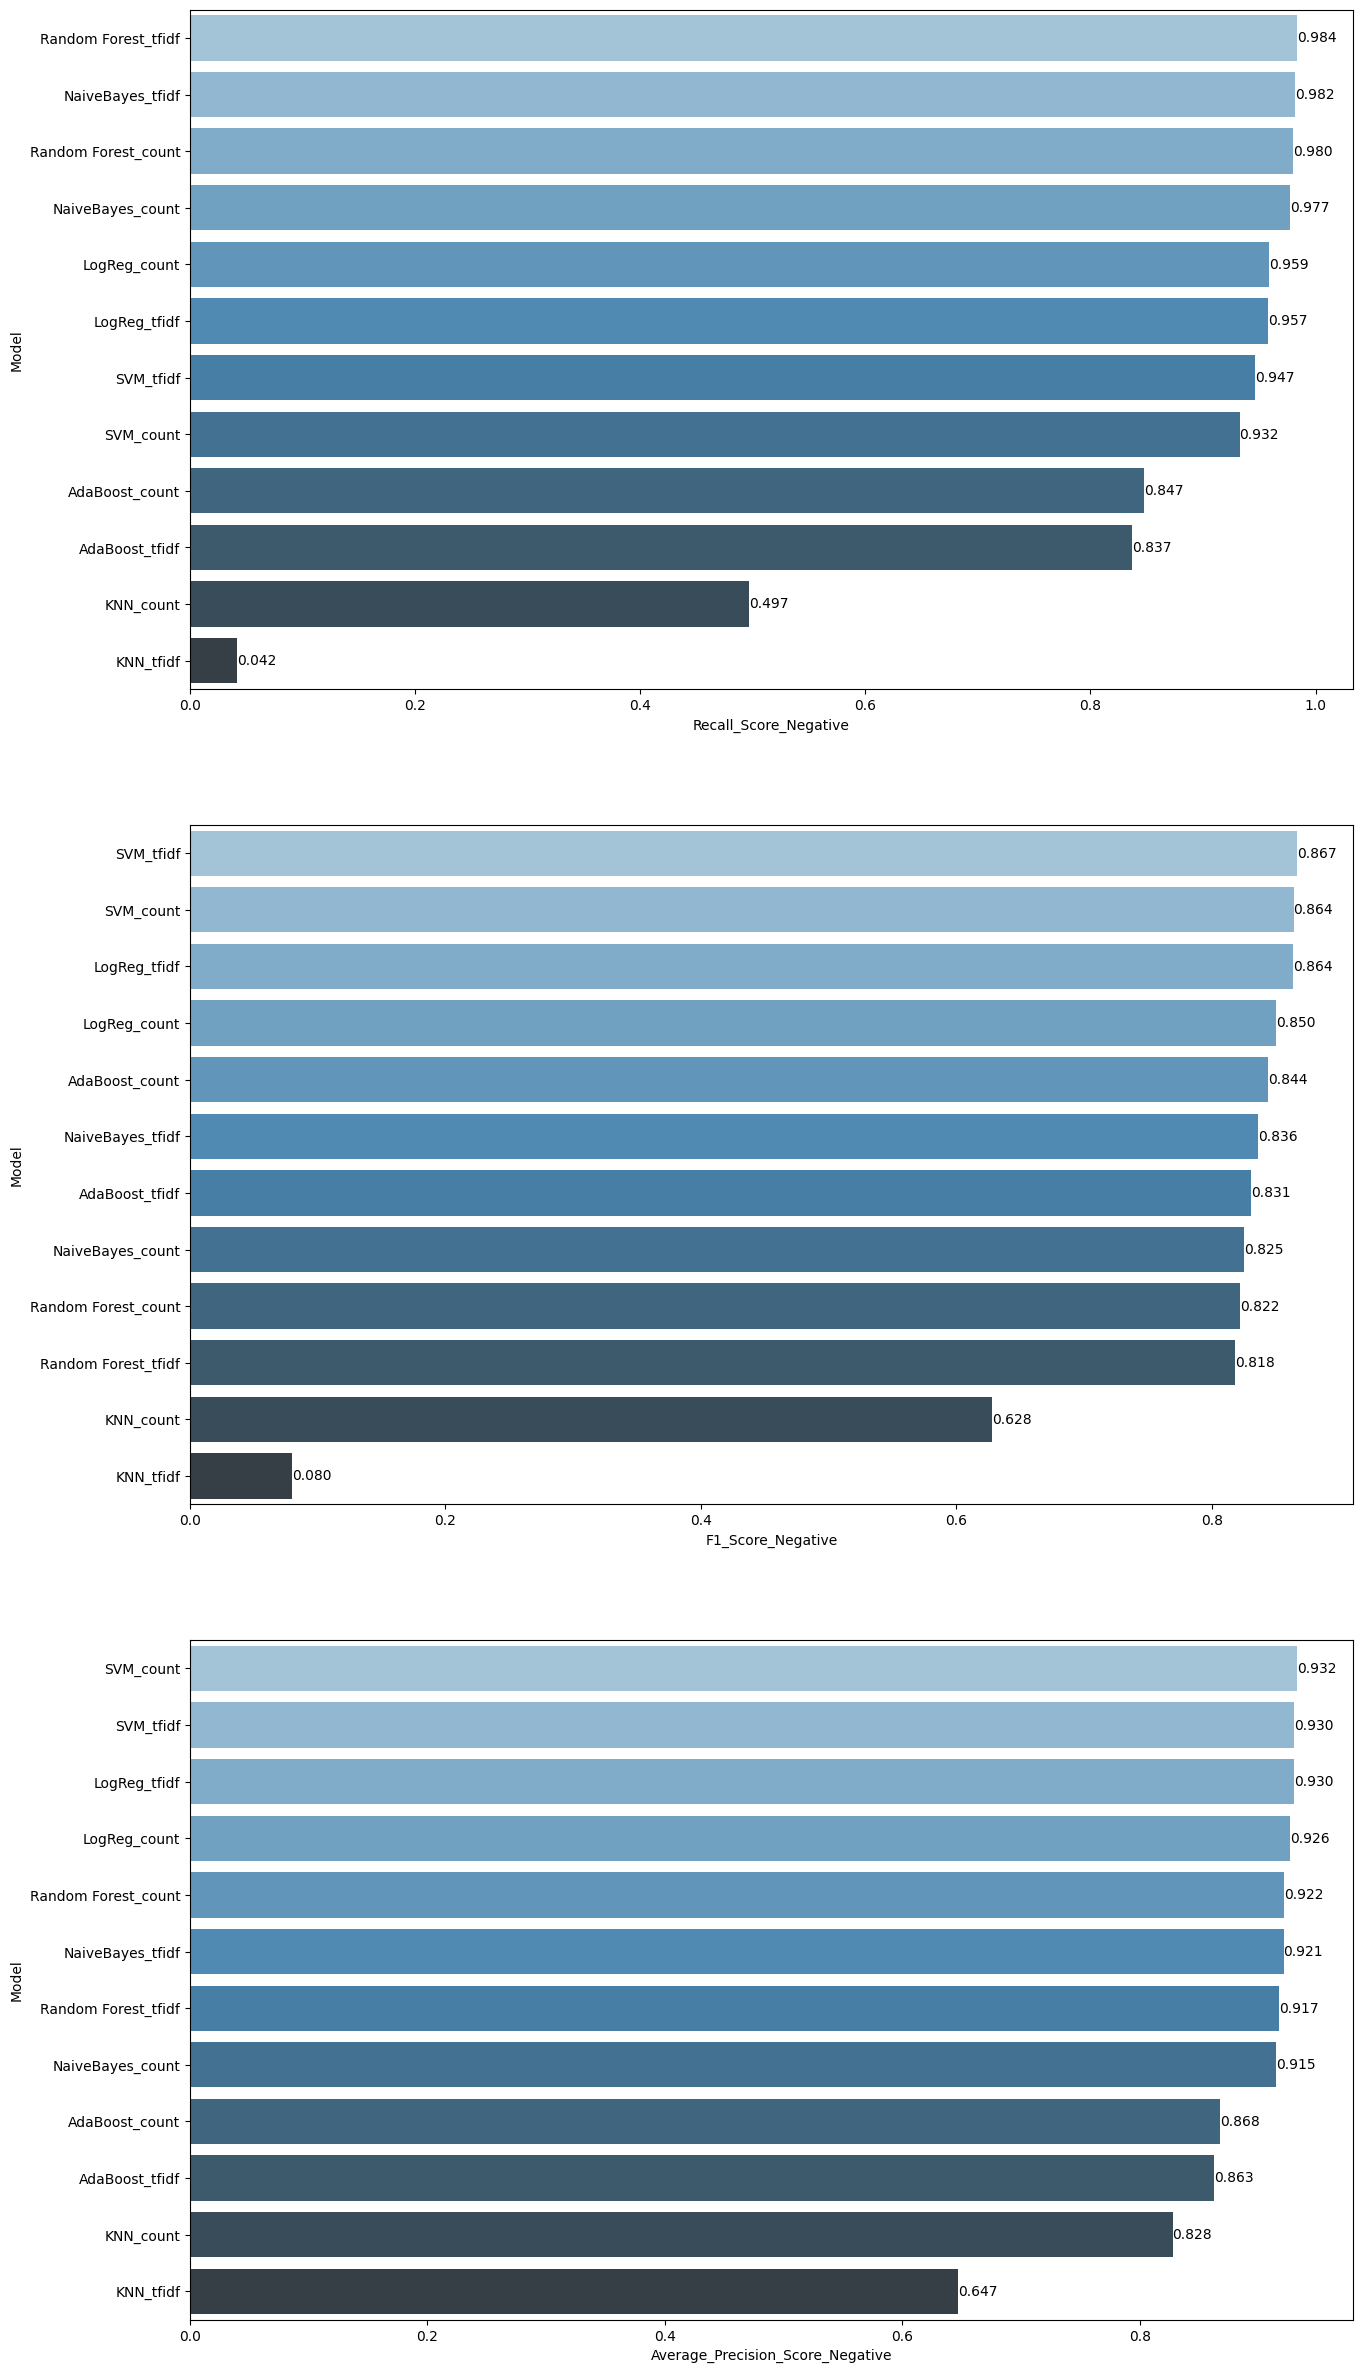

In [111]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score_Negative", ascending=False)
ax=sns.barplot(x="Recall_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score_Negative", ascending=False)
ax=sns.barplot(x="F1_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score_Negative", ascending=False)
ax=sns.barplot(x="Average_Precision_Score_Negative", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

# Although the RF and NB models have higher recall scores, their F1 scores are lower, indicating that the precision scores of these models are relatively
# lower than those of logistic regression or SVM.

# For us, having a high recall alone is not important. It is necessary for both recall and precision to be as high as possible. Therefore,
# we will continue with logrec tf-idf

## For New Tweets, prediction with pipeline


In [112]:
from sklearn.pipeline import Pipeline

In [113]:
pipe = Pipeline([('tfidf',TfidfVectorizer(preprocessor=cleaning, min_df=3)),
                 ('log',LogisticRegression(C=0.4, max_iter=1000))])

In [114]:
X.head()

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [115]:
pipe.fit(X, y)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(min_df=3,
                                 preprocessor=<function cleaning at 0x79dc11aba3b0>)),
                ('log', LogisticRegression(C=0.4, max_iter=1000))])

## Prediction

In [116]:
tweet = "it was not the worst flight i have ever been."
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [117]:
tweet = "it is amazing flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['positive'], dtype=object)

In [118]:
tweet = "I don't think I'll ever use American Airlines anymore"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['negative'], dtype=object)

In [119]:
tweet = "ok flight"
tweet = pd.Series(tweet)
pipe.predict(tweet)

array(['neutral'], dtype=object)

## WordCloud - Repetition of Words

## Collect Words

In [120]:
tweets = cleaning_text
tweets

0                                                     said
1             plus youve added commercial experience tacky
2             didnt today must mean need take another trip
3        really aggressive blast obnoxious entertainmen...
4                                     really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    leaving minute late flight no warning communic...
14637                        please bring american airline
14638    money change flight dont answer phone suggesti...
14639    ppl need know many seat next flight plz put u ...
Name: text, Length: 14640, dtype: object

In [121]:
all_words = " ".join(tweets)

In [122]:
all_words[:100]

'said plus youve added commercial experience tacky didnt today must mean need take another trip reall'

## Create Word Cloud

In [123]:
#pip install wordcloud
#conda install -c conda-forge wordcloud

In [124]:
from wordcloud import WordCloud

# A word cloud is used to visually represent the frequency of words in text files. In this visual representation, the visual size of the words in
# the text file is determined by their frequency. As a result, the most frequently used words in the text file are displayed the largest.

# A word cloud can be used to analyze the content of comments gathered from a social media account. By considering the most frequently occurring tokens
# in these comments, it is possible to analyze which topic is being discussed or highlighted.

In [125]:
worldcloud = WordCloud(background_color="white", max_words =250)

# Create a visual representation of the top 250 most frequently occurring tokens in the corpus, with a white background color.

In [126]:
worldcloud.generate(all_words)

# The 'generate' command is used to determine the top 250 most frequently occurring tokens in our data, according to the instructions provided above.

In [127]:
import matplotlib.pyplot as plt # The matplotlib library is used for visualization purposes
plt.figure(figsize = (13,13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")
plt.show()